In [7]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import squarify




In [8]:
data=pd.read_csv("C:/Users/chira/Downloads/rfm/OnlineRetail.csv",encoding=('ISO-8859-1'))

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
data.shape

(541909, 8)

In [11]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [15]:
data.dropna(inplace=True)

In [16]:
data.shape

(406829, 8)

## Verify Quantity must be Greater than Zero

In [17]:
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


## Dropping Rows in which Quantity < 0


In [18]:
data.drop(data[data['Quantity'] <= 0].index,inplace=True)


In [19]:
data.shape


(397924, 8)

In [20]:
data.drop(data[data['UnitPrice'] <= 0].index,inplace=True)


In [21]:
data.shape


(397884, 8)

In [22]:
data['CustomerID'] = data['CustomerID'].astype(int)
data['CustomerID'] = data['CustomerID'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  object 
 7   Country      397884 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.3+ MB


In [23]:
data['CustomerID'].dtype


dtype('O')

In [24]:
duplicate = data[data.duplicated('InvoiceNo')] 
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [25]:
data.shape


(397884, 8)

In [26]:
data['InvoiceNo'].count()


397884

In [27]:
data['InvoiceNo'].dtypes


dtype('O')

In [28]:
data[data.Quantity == data.Quantity.max()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom


In [29]:
data[data.Quantity == data.Quantity.min()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,536381,71270,PHOTO CLIP LINE,1,12/1/2010 9:41,1.25,15311,United Kingdom
114,536381,22262,FELT EGG COSY CHICKEN,1,12/1/2010 9:41,0.85,15311,United Kingdom
115,536381,22637,PIGGY BANK RETROSPOT,1,12/1/2010 9:41,2.55,15311,United Kingdom
118,536381,21166,COOK WITH WINE METAL SIGN,1,12/1/2010 9:41,1.95,15311,United Kingdom
120,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,12/1/2010 9:41,2.95,15311,United Kingdom
...,...,...,...,...,...,...,...,...
541851,581580,22721,SET OF 3 CAKE TINS SKETCHBOOK,1,12/9/2011 12:20,1.95,12748,United Kingdom
541855,581580,21351,CINAMMON & ORANGE WREATH,1,12/9/2011 12:20,6.75,12748,United Kingdom
541856,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,12/9/2011 12:20,2.95,12748,United Kingdom
541857,581580,22567,20 DOLLY PEGS RETROSPOT,1,12/9/2011 12:20,1.45,12748,United Kingdom


In [30]:

data[data.UnitPrice == data.UnitPrice.min()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,4/15/2011 9:27,0.001,13952,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,7/26/2011 10:13,0.001,15618,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,9/25/2011 14:58,0.001,16198,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,9/26/2011 17:01,0.001,13405,United Kingdom


In [31]:
data[data.UnitPrice == data.UnitPrice.max()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029,United Kingdom


In [32]:
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [33]:
data['Country'].value_counts()


United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

## Getting the Highest Quantity Countrywise


In [34]:
gb =data.groupby('Country').Quantity.max()


In [35]:
gb

Country
Australia                1152
Austria                   288
Bahrain                    96
Belgium                   272
Brazil                     24
Canada                    504
Channel Islands           407
Cyprus                    288
Czech Republic             72
Denmark                   256
EIRE                     1440
European Community         24
Finland                   144
France                    912
Germany                   600
Greece                     48
Iceland                   240
Israel                    100
Italy                     200
Japan                    2040
Lebanon                    24
Lithuania                  48
Malta                      48
Netherlands              2400
Norway                    240
Poland                     72
Portugal                  120
RSA                        12
Saudi Arabia               12
Singapore                 288
Spain                     360
Sweden                    768
Switzerland               288
US

In [36]:
data['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 397884, dtype: object

In [37]:
data['YearOfSale'] = pd.DatetimeIndex(data['InvoiceDate']).year
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,2011


In [38]:
numerical_variables = [feature for feature in data.columns if (data[feature].dtypes != 'O' and data[feature].dtypes !='<M8[ns]')]
numerical_variables

['Quantity', 'UnitPrice', 'YearOfSale']

## Finding correlations

In [39]:
data_corr = data[numerical_variables].corr()

In [40]:
data_corr

,Quantity,UnitPrice,YearOfSale
Quantity,1.000000,-0.004563,0.001553
UnitPrice,-0.004563,1.000000,-0.000192
YearOfSale,0.001553,-0.000192,1.000000


## Creating the HeatMap

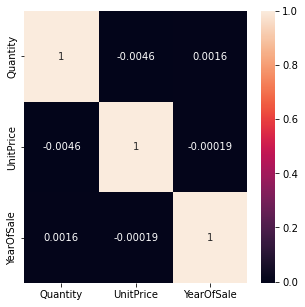

In [41]:
fig, ax = plt.subplots(figsize=(5,5))
heat_map = sns.heatmap(data_corr,annot=True,ax=ax)

In [42]:
data.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)[:5]


Country
United Kingdom    4256740
Netherlands        200361
EIRE               140275
Germany            119261
France             111471
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='Country'>

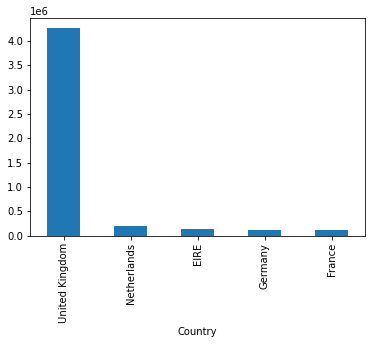

In [43]:
data.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False)[:5].plot(kind='bar')


In [44]:
data['YearOfSale'].unique()


array([2010, 2011], dtype=int64)

In [45]:
data.groupby(['YearOfSale'])['Quantity'].sum()

YearOfSale
2010     312265
2011    4855547
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='YearOfSale'>

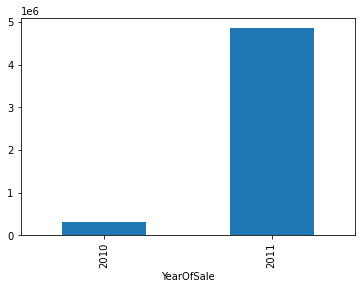

In [46]:
data.groupby(['YearOfSale'])['Quantity'].sum().plot(kind='bar')


## Total unitprice sold by year


<AxesSubplot:xlabel='YearOfSale'>

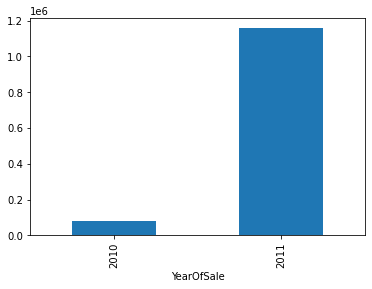

In [47]:
data.groupby(['YearOfSale'])['UnitPrice'].sum().plot(kind='bar')


In [48]:
data.groupby(['InvoiceNo'])['Quantity'].sum().sort_values(ascending=False)[:10]


InvoiceNo
581483    80995
541431    74215
556917    15049
563076    14730
572035    13392
567423    12572
552883    12266
563614    12196
562439    11848
548011    11116
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='InvoiceNo'>

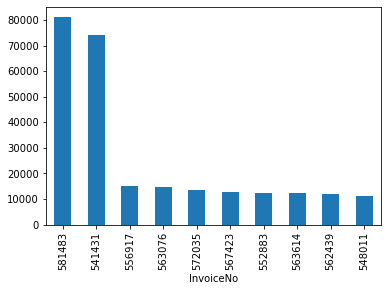

In [49]:
data.groupby(['InvoiceNo'])['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='bar')


In [50]:
data['InvoiceDate']

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 397884, dtype: object

In [51]:
data['InvoiceNo']


0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 397884, dtype: object

In [52]:
data[['Quantity','UnitPrice']]


,Quantity,UnitPrice
0,6,2.55
1,6,3.39
2,8,2.75
3,6,3.39
4,6,3.39
...,...,...
541904,12,0.85
541905,6,2.10
541906,4,4.15
541907,4,4.15


In [53]:
data['Price'] = data['Quantity'] * data['UnitPrice']


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  object 
 7   Country      397884 non-null  object 
 8   YearOfSale   397884 non-null  int64  
 9   Price        397884 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 33.4+ MB


In [55]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearOfSale,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2010,20.34


In [56]:
data['InvoiceDate'].min()

'1/10/2011 10:32'

In [57]:
data['InvoiceDate'].max()

'9/9/2011 9:52'

In [58]:
Now = dt.datetime(2011,12,10)



In [59]:
Now

datetime.datetime(2011, 12, 10, 0, 0)

In [60]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])


In [61]:
data['InvoiceDate']


0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 397884, dtype: datetime64[ns]

## Create RFM TABLE(RECENCY,FREQUENCY AND MONETARY)

In [62]:
rfmTable = data.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Now - x.max()).days,
                                         'InvoiceNo' : lambda x :len(x),'Price' : lambda x :sum(x) })

In [63]:
rfmTable.rename(columns ={'InvoiceDate' : 'Recency', 'InvoiceNo' :'Frequency',
                          'Price':'Monetary_Value'},inplace = True)

In [64]:
rfmTable.head()

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346,325,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40


In [65]:
rfmTable.shape

(4338, 3)

## Calculate R and F Groups


In [66]:
# We create a 4 labels for our labels, where 4 is the “best” quantile

r_labels = range(4,0,-1)
f_labels = range(1,5)
m_labels = range(1,5)

r_groups = pd.qcut(rfmTable['Recency'],4,r_labels)

f_groups = pd.qcut(rfmTable['Frequency'],4,f_labels)

m_groups = pd.qcut(rfmTable['Monetary_Value'],4,m_labels)

rfmTable = rfmTable.assign(R=r_groups,F=f_groups,M=m_groups)

rfmTable.head()

rfmTable.info()

rfmTable.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Recency         4338 non-null   int64   
 1   Frequency       4338 non-null   int64   
 2   Monetary_Value  4338 non-null   float64 
 3   R               4338 non-null   category
 4   F               4338 non-null   category
 5   M               4338 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.7+ KB


Recency              int64
Frequency            int64
Monetary_Value     float64
R                 category
F                 category
M                 category
dtype: object

## Convert Categorical to String Datatype And Creating The Segments.


In [67]:
rfmTable['R'] = rfmTable['R'].astype(str)
rfmTable['F'] = rfmTable['F'].astype(str)
rfmTable['M'] = rfmTable['M'].astype(str)

In [68]:
rfmTable['RFM_Segment'] = rfmTable['R'].map(str) + rfmTable['F'].map(str) + rfmTable['M'].map(str)

rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment
CustomerID,,,,,,,
12346,325,1,77183.60,1,1,4,114
12347,2,182,4310.00,4,4,4,444
12348,75,31,1797.24,2,2,4,224
12349,18,73,1757.55,3,3,4,334
12350,310,17,334.40,1,1,2,112


In [69]:
#Count Number of Unique Segments

rfm_segment = rfmTable.groupby('RFM_Segment')['RFM_Segment']



print('The Number of Unique Segment is - ',rfm_segment.nunique().sum())
print('***********************************')
print(rfm_segment.unique())
print('***********************************')

The Number of Unique Segment is -  61
***********************************
RFM_Segment
111    [111]
112    [112]
113    [113]
114    [114]
121    [121]
       ...  
434    [434]
441    [441]
442    [442]
443    [443]
444    [444]
Name: RFM_Segment, Length: 61, dtype: object
***********************************


## RFM Score


In [70]:
rfmTable['R'] = rfmTable['R'].astype(int)
rfmTable['F'] = rfmTable['F'].astype(int)
rfmTable['M'] = rfmTable['M'].astype(int)

In [71]:
rfmTable['RFM_Score'] = rfmTable[['R','F','M']].sum(axis=1)

In [72]:
rfmTable

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6
12347,2,182,4310.00,4,4,4,444,12
12348,75,31,1797.24,2,2,4,224,8
12349,18,73,1757.55,3,3,4,334,10
12350,310,17,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280,277,10,180.60,1,1,1,111,3
18281,180,7,80.82,1,1,1,111,3
18282,7,12,178.05,4,1,1,411,6


## Define and Create the category of the people on the basis of their RFM Score

In [73]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfmTable['RFM_Level'] = rfmTable.apply(rfm_level, axis=1)

rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6,Potential
12347,2,182,4310.00,4,4,4,444,12,Can't Loose Them
12348,75,31,1797.24,2,2,4,224,8,Champions
12349,18,73,1757.55,3,3,4,334,10,Can't Loose Them
12350,310,17,334.40,1,1,2,112,4,Needs Attention


In [74]:
rfm_level_agg = rfmTable.groupby('RFM_Level').agg({'Recency' :'mean',
                                       'Frequency':'mean',
                                       'Monetary_Value':['mean','count']}).round(1)

In [75]:
rfm_level_agg

Recency Frequency Monetary_Value      
                      mean      mean           mean count
RFM_Level                                                
Can't Loose Them      25.9     192.0         4406.5  1676
Champions             63.7      57.0          994.1   459
Loyal                 79.3      38.7          760.4   452
Needs Attention      174.2      13.7          239.0   385
Potential             95.6      28.0          823.8   464
Promising            153.3      21.4          368.7   517
Require Activation   260.4       8.2          159.3   385

## RFM Visulation

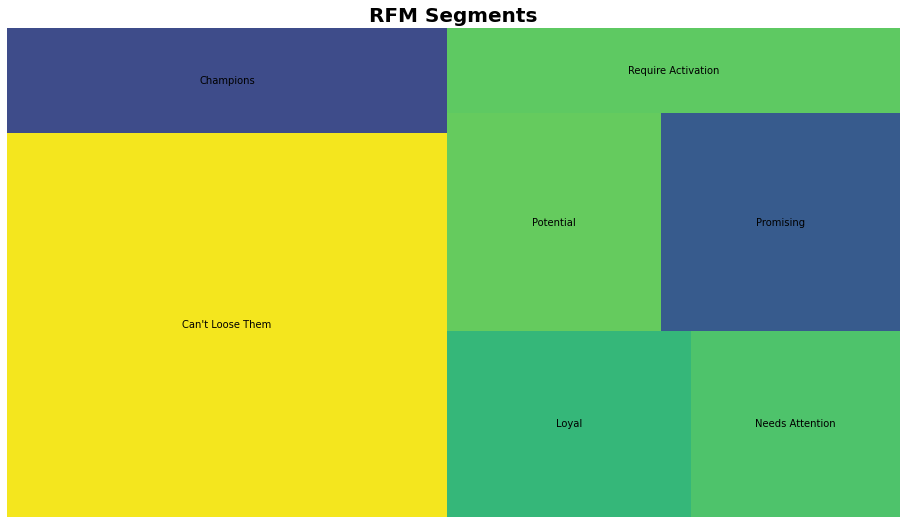

In [77]:
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
import squarify as sq
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
sq.plot(sizes=rfm_level_agg['Count'], 
              label=["Can't Loose Them",
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=1)
plt.title("RFM Segments",fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

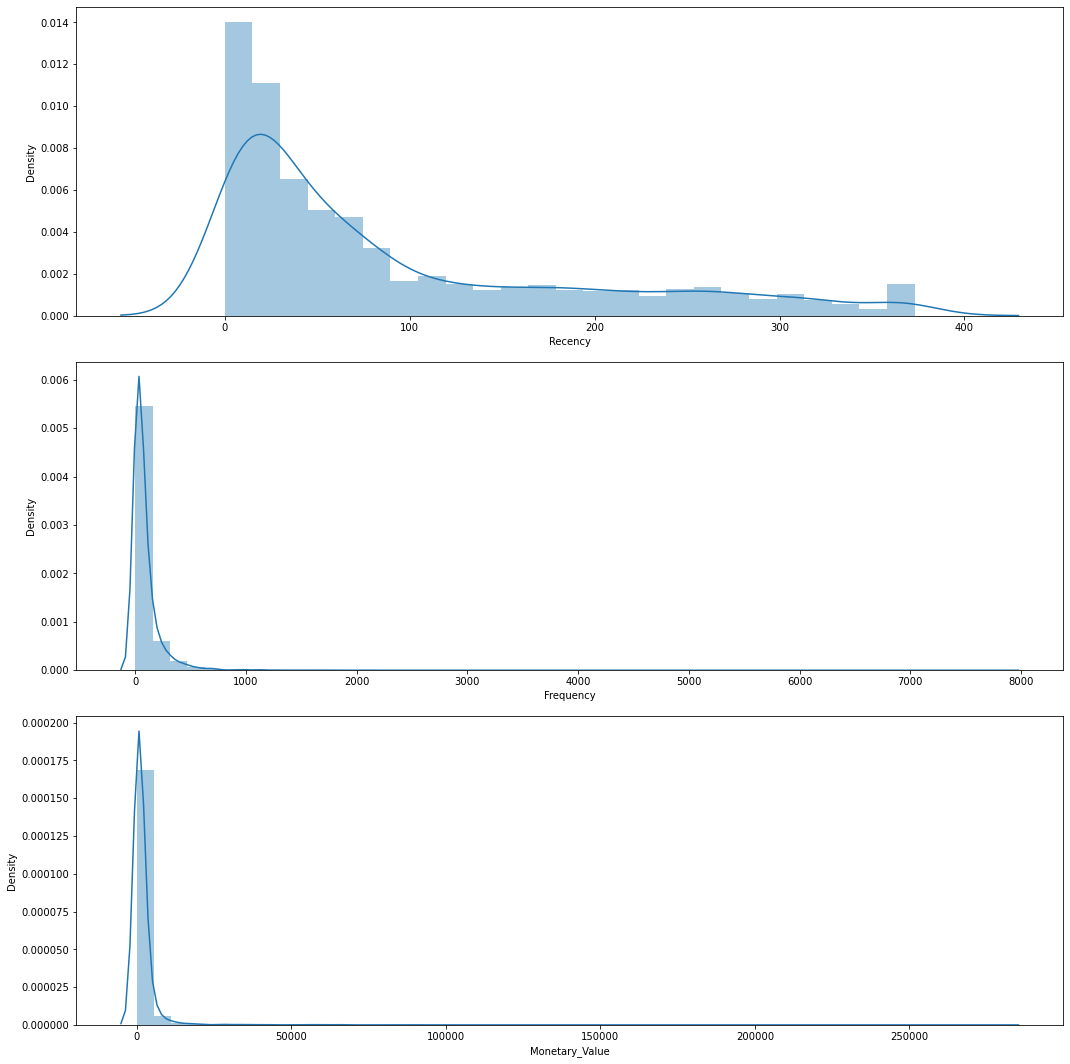

In [78]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfmTable.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfmTable.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfmTable.Monetary_Value, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

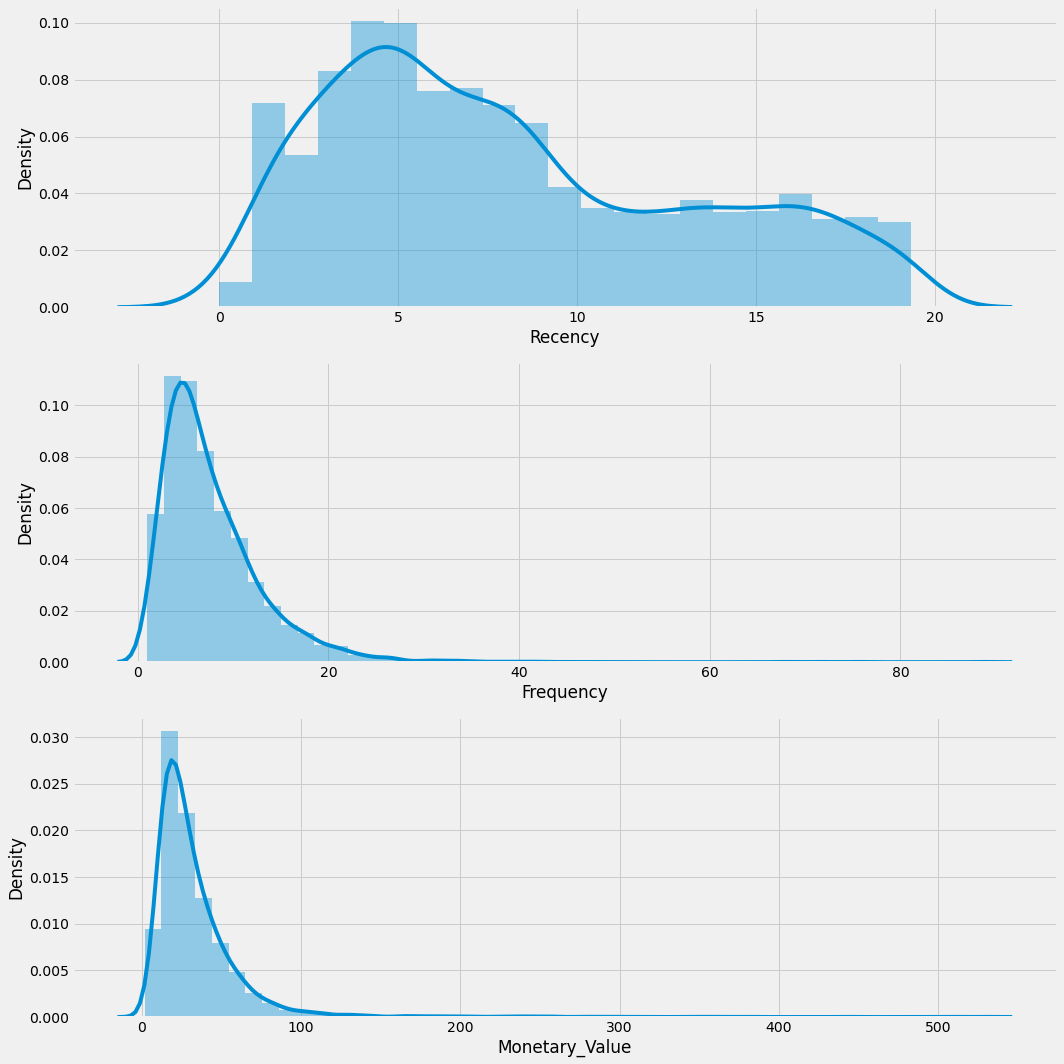

In [81]:
rfm_sqrt = rfmTable[['Recency', 'Frequency', 'Monetary_Value']].apply(np.sqrt, axis = 1).round(3)


f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfm_sqrt.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_sqrt.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_sqrt.Monetary_Value, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

## Implementation of K Means Clustering


In [82]:
from sklearn.preprocessing import StandardScaler  


In [83]:
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_sqrt)
rfm_normalized.shape

(4338, 3)

## Elbow Method

In [85]:
from sklearn.cluster import KMeans 

In [86]:
inertia = []
kr = range(1,8)
for k in kr:
    km = KMeans(n_clusters = k,random_state=1)
    km.fit(rfm_normalized)
    inertia.append(km.inertia_)

In [87]:
print (inertia)

[13013.999999999969, 8258.24003956993, 5672.519703051772, 4217.659877913251, 3490.362089654071, 3113.4356366490506, 2789.8656533611675]


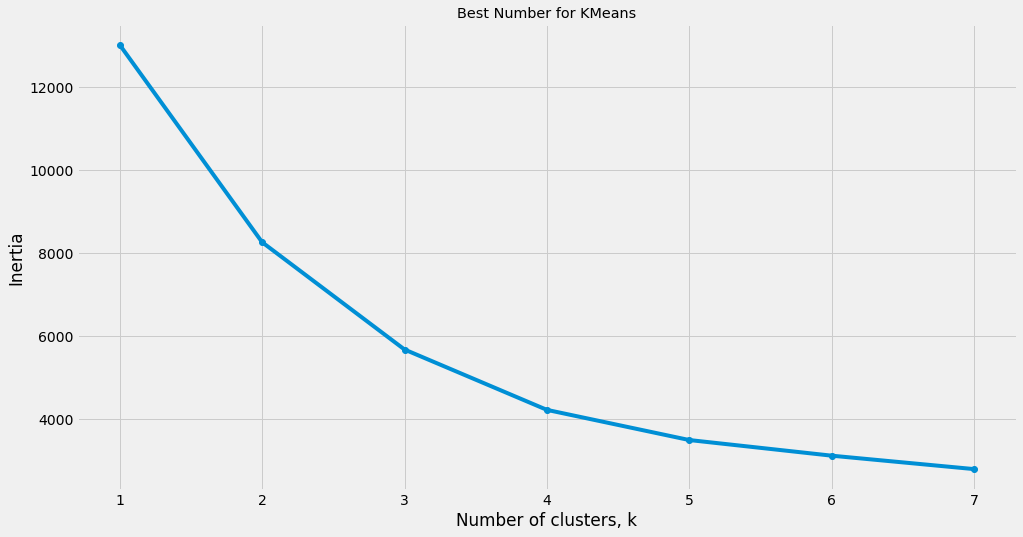

In [88]:
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_normalized)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Best Number for KMeans')
plt.show()

## Here we have Number of clusters=3

In [89]:
# clustering
kc = KMeans(n_clusters=3,random_state=1)
kc.fit(rfm_normalized)

KMeans(n_clusters=3, random_state=1)

In [90]:
# Assign the clusters to datamart
rfmTable['K_Cluster'] = kc.labels_
rfmTable.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12346,325,1,77183.60,1,1,4,114,6,Potential,1
12347,2,182,4310.00,4,4,4,444,12,Can't Loose Them,1
12348,75,31,1797.24,2,2,4,224,8,Champions,0
12349,18,73,1757.55,3,3,4,334,10,Can't Loose Them,0
12350,310,17,334.40,1,1,2,112,4,Needs Attention,2


[]

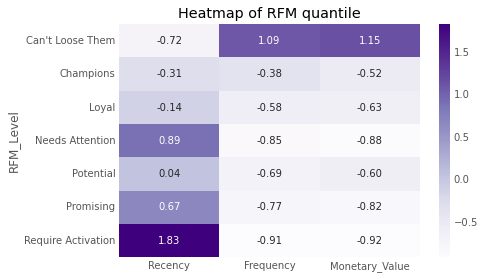

In [96]:
# the mean value in total 
total_avg = rfmTable.iloc[:, 0:3].mean()
total_avg
# calculate the proportional gap with total mean
cluster_avg = rfmTable.groupby('RFM_Level').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
# heatmap with RFM
sns.heatmap(prop_rfm, cmap= 'Purples', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()

[]

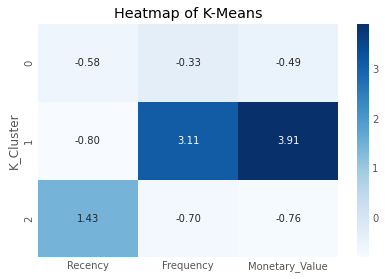

In [97]:
# calculate the proportional gap with total mean
cluster_avg_K = rfmTable.groupby('K_Cluster').mean().iloc[:, 0:3]
prop_rfm_K = cluster_avg_K/total_avg - 1
# heatmap with K-means
sns.heatmap(prop_rfm_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()